In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('wc-wo-outliers.csv')

In [3]:
y = df['results']
X = df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1)

In [4]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42
)

In [5]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

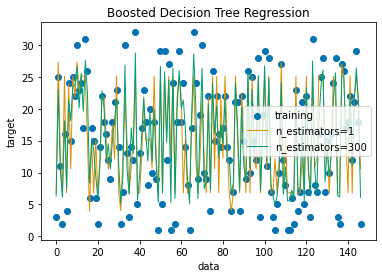

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train=np.arange(0,len(X_train),1)

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X_train, y_train, color=colors[0], label="training")
plt.plot(X_train, y_1, color=colors[1], label="n_estimators=1", linewidth=1)
plt.plot(X_train, y_2, color=colors[2], label="n_estimators=300", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [7]:
y_pred = regr_2.predict(X_test)

In [8]:
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.25372325362400183
RMSE : 7.670494148964711
MSE: 58.83648048930187
MAE: 6.4149647738598645
MAPE: 0.9735006643523791


In [11]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

In [13]:
kf = KFold(n_splits=2)

In [ ]:
loo.get_n_splits(X)